## LSTM Network for Regression

In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
# 결과를 재현할 후 있도록 RANDOM SEED를 고정
SEED = 7
numpy.random.seed(SEED)

### 데이터세트 불러오기

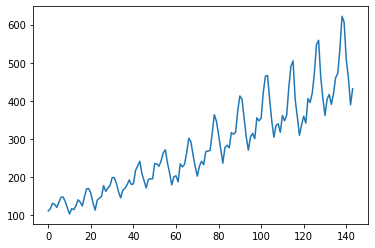

In [3]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('airline-passengers.csv', usecols=[1], engine='python')
plt.plot(dataset)
plt.show()

## 데이터세트 정규화

In [4]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

### Train, Test 데이터세트 분리

In [5]:
split_rate = 0.67

# split into train and test sets
train_size = int(len(dataset) * split_rate)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


### LSTM 학습을 위한 데이터세트 구성

In [6]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [7]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [8]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

### 모델 구현

In [9]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, trainX.shape[1])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 2s - loss: 0.0214
Epoch 2/100
94/94 - 0s - loss: 0.0092
Epoch 3/100
94/94 - 0s - loss: 0.0080
Epoch 4/100
94/94 - 0s - loss: 0.0071
Epoch 5/100
94/94 - 0s - loss: 0.0063
Epoch 6/100
94/94 - 0s - loss: 0.0056
Epoch 7/100
94/94 - 0s - loss: 0.0049
Epoch 8/100
94/94 - 0s - loss: 0.0042
Epoch 9/100
94/94 - 0s - loss: 0.0037
Epoch 10/100
94/94 - 0s - loss: 0.0033
Epoch 11/100
94/94 - 0s - loss: 0.0029
Epoch 12/100
94/94 - 0s - loss: 0.0026
Epoch 13/100
94/94 - 0s - loss: 0.0024
Epoch 14/100
94/94 - 0s - loss: 0.0023
Epoch 15/100
94/94 - 0s - loss: 0.0022
Epoch 16/100
94/94 - 0s - loss: 0.0021
Epoch 17/100
94/94 - 0s - loss: 0.0021
Epoch 18/100
94/94 - 0s - loss: 0.0021
Epoch 19/100
94/94 - 0s - loss: 0.0021
Epoch 20/100
94/94 - 0s - loss: 0.0021
Epoch 21/100
94/94 - 0s - loss: 0.0020
Epoch 22/100
94/94 - 0s - loss: 0.0020
Epoch 23/100
94/94 - 0s - loss: 0.0021
Epoch 24/100
94/94 - 0s - loss: 0.0020
Epoch 25/100
94/94 - 0s - loss: 0.0021
Epoch 26/100
94/94 - 0s - loss: 0.

In [10]:
### 모델 예측
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.78 RMSE
Test Score: 48.06 RMSE


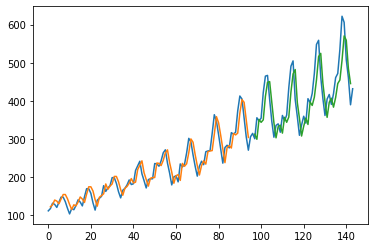

In [11]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()